<a href="https://colab.research.google.com/github/juandiantonius/mkdir-gitklasa_juandi/blob/master/Technical_Task_Module_5_%5BJuandi_Antonius%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib --upgrade
!pip install sklearn --upgrade
!pip install mplleaflet
!pip install urbangrammar_graphics

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
import urbangrammar_graphics as ugg

from sklearn.datasets import load_breast_cancer



In [3]:
# instantiating
tabel_cancer = load_breast_cancer(as_frame=True)

In [4]:
# creating dataframe
data = pd.DataFrame(data=tabel_cancer.data, columns=tabel_cancer.feature_names)

In [ ]:
data.describe()

In [6]:
data['target'] = tabel_cancer.target

**k-Means Clustering towards the dataset**

In [7]:
# Data preprocessing
scaler = StandardScaler()
scaler.fit(data)
scaled_df = scaler.transform(data)

In [8]:
%%time
distortions = []
K = range(1,10)
for k in K:
  kmean_model = KMeans(n_clusters=k)
  kmean_model.fit(scaled_df)
  distortions.append(kmean_model.inertia_)

CPU times: user 2.05 s, sys: 928 ms, total: 2.98 s
Wall time: 1.56 s


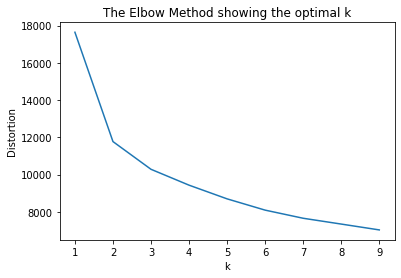

In [9]:
plt.plot(range(1,10), distortions)
plt.title('The Elbow Method showing the optimal k')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [10]:
%%time
kmean_model = KMeans(n_clusters=2)
data["kmean_output"] = kmean_model.fit_predict(scaled_df)

CPU times: user 120 ms, sys: 58.7 ms, total: 179 ms
Wall time: 94.4 ms


In [11]:
%%time
adjusted_rand_score(data["target"], data["kmean_output"])

CPU times: user 5.59 ms, sys: 0 ns, total: 5.59 ms
Wall time: 6.06 ms


0.7361362834245846

Text(0.5, 1.01, 'KMeans Outputs')

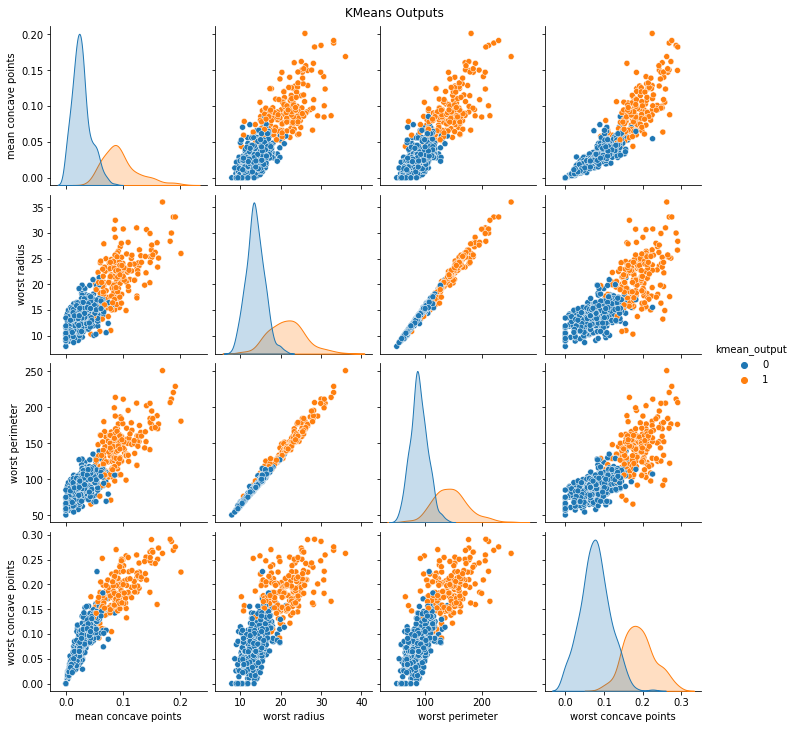

In [12]:
graph = sns.pairplot(data.iloc[:, [7,20,22,27,31]],
                     hue = "kmean_output")
graph.fig.suptitle("KMeans Outputs", y = 1.01)

**k-Means Clustering for n Principal Components**

In [13]:
# Data preprocessing
scaler = StandardScaler()
scaler.fit(data)
scaled_PCA = scaler.transform(data)

In [14]:
# Running PCA
from sklearn.decomposition import PCA

In [15]:
# Let's say, components = 2
pca = PCA(n_components=2)

In [16]:
pca.fit(scaled_PCA)
pca.explained_variance_ratio_[:4].sum()

0.6374096377375159

In [17]:
%%time
pca = PCA(n_components=2)
pca.fit(scaled_PCA)
x_pca = pca.transform(scaled_PCA)
df_pca = pd.DataFrame(data=x_pca, columns=["PC_1", "PC_2"])
df_pca["target"] = tabel_cancer["target"]

CPU times: user 6.57 ms, sys: 8.16 ms, total: 14.7 ms
Wall time: 12.1 ms


In [22]:
data['PCA'] = pd.Series(kmean_model.fit_predict(scaled_PCA), index=data.index)

Text(0.5, 1.01, 'KMeans PCA')

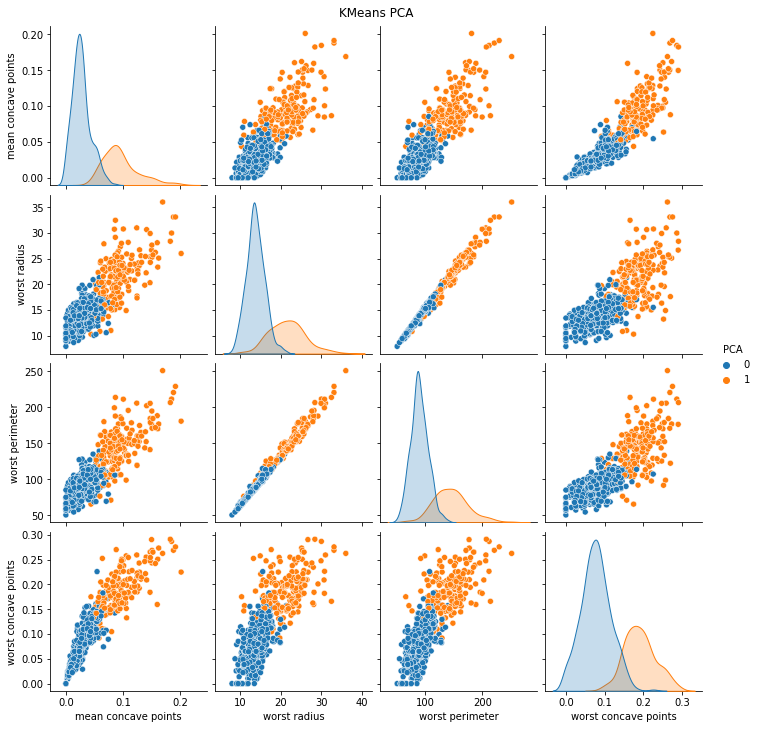

In [24]:
graph = sns.pairplot(data.iloc[:, [7,20,22,27,32]],
                     hue = "PCA")
graph.fig.suptitle("KMeans PCA", y = 1.01)

In [25]:
%%time
adjusted_rand_score(data["target"], data["PCA"])

CPU times: user 3.87 ms, sys: 0 ns, total: 3.87 ms
Wall time: 5.1 ms


0.7361362834245846